In [36]:
data_url = ('https://thredds-jumbo.unidata.ucar.edu/thredds/catalog/grib/NCEP/GFS/Global_0p25deg/catalog.xml?dataset=grib/NCEP/GFS/Global_0p25deg/Best')

In [37]:
from datetime import datetime, timedelta
import io

from metpy.units import units
from metpy.plots import ImagePlot, MapPanel, PanelContainer
from siphon.catalog import TDSCatalog
import xarray as xr

%matplotlib inline

from PIL import Image
import glob
import os

In [38]:
best_gfs = TDSCatalog(data_url)

In [39]:
best_ds = best_gfs.datasets[0]
ncss = best_ds.subset()

In [40]:
query = ncss.query()

In [48]:
frame = 40

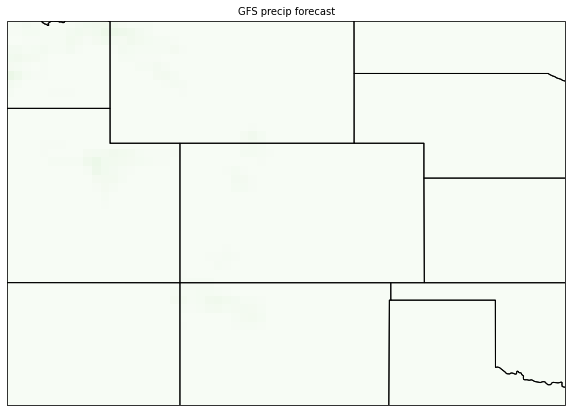

In [52]:
query.lonlat_box(north=50, south=25, east=-60, west=-130).time(datetime.utcnow() + timedelta(hours=frame))
query.accept('netcdf4')
query.variables('Precipitation_rate_surface')

data = ncss.get_data_raw(query)

gfs = xr.open_dataset(io.BytesIO(data))

img = ImagePlot()
img.data = gfs
#gfs.Temperature_surface[0][10][10] = 400.0
img.field = 'Precipitation_rate_surface'
img.colormap = 'Greens'

panel = MapPanel()
panel.area = 'co'
panel.layers = ['states']
panel.title = 'GFS precip forecast'
panel.plots = [img]

pc = PanelContainer()
pc.size = (10, 8)
pc.panels = [panel]
pc.show()

In [50]:
gfs

<xarray.Dataset>
Dimensions:                     (time1: 1, lat: 101, lon: 281)
Coordinates:
    reftime1                    (time1) datetime64[ns] ...
  * time1                       (time1) datetime64[ns] 2021-12-23T18:00:00
  * lat                         (lat) float32 50.0 49.75 49.5 ... 25.25 25.0
  * lon                         (lon) float32 230.0 230.2 230.5 ... 299.8 300.0
Data variables:
    Precipitation_rate_surface  (time1, lat, lon) float32 ...
    LatLon_Projection           int32 ...
Attributes: (12/13)
    Originating_or_generating_Center:                                        ...
    Originating_or_generating_Subcenter:                                     ...
    GRIB_table_version:                                                      ...
    Type_of_generating_process:                                              ...
    Analysis_or_forecast_generating_process_identifier_defined_by_originating...
    Conventions:                                                             ...
    ...                                                                                ...
    featureType:                                                             ...
    History:                                                                 ...
    geospatial_lat_min:                                                      ...
    geospatial_lat_max:                                                      ...
    geospatial_lon_min:                                                      ...
    geospatial_lon_max:                                                      ...

In [44]:
gfs

<xarray.Dataset>
Dimensions:                     (time1: 1, lat: 101, lon: 281)
Coordinates:
    reftime1                    (time1) datetime64[ns] 2021-12-21T18:00:00
  * time1                       (time1) datetime64[ns] 2021-12-23T03:00:00
  * lat                         (lat) float32 50.0 49.75 49.5 ... 25.25 25.0
  * lon                         (lon) float32 230.0 230.2 230.5 ... 299.8 300.0
Data variables:
    Precipitation_rate_surface  (time1, lat, lon) float32 6.8e-06 ... 0.0
    LatLon_Projection           int32 0
Attributes: (12/13)
    Originating_or_generating_Center:                                        ...
    Originating_or_generating_Subcenter:                                     ...
    GRIB_table_version:                                                      ...
    Type_of_generating_process:                                              ...
    Analysis_or_forecast_generating_process_identifier_defined_by_originating...
    Conventions:                                                             ...
    ...                                                                                ...
    featureType:                                                             ...
    History:                                                                 ...
    geospatial_lat_min:                                                      ...
    geospatial_lat_max:                                                      ...
    geospatial_lon_min:                                                      ...
    geospatial_lon_max:                                                      ...

In [ ]:
i = 0
for i in range(0,360,12):
    query.lonlat_box(north=50, south=25, east=-60, west=-130).time(datetime.utcnow() + timedelta(hours=i))
    query.accept('netcdf4')
    query.variables('Precipitation_rate_surface')

    data = ncss.get_data_raw(query)

    gfs = xr.open_dataset(io.BytesIO(data))

    img = ImagePlot()
    img.data = gfs
    #gfs.Temperature_surface[0][10][10] = 400.0
    img.field = 'Precipitation_rate_surface'
    img.colormap = 'Greens'

    panel = MapPanel()
    panel.area = 'wa'
    panel.layers = ['states']
    panel.title = 'GFS precip forecast'
    panel.plots = [img]

    pc = PanelContainer()
    pc.size = (10, 8)
    pc.panels = [panel]
    #pc.show()
    pc.save(str(i)+"gfs_img.jpg")

# Create the frames
frames = []
imgs = list(glob.glob("*gfs_img.jpg"))
imgs.sort()
for i in imgs:
    new_frame = Image.open(i)
    frames.append(new_frame)
    os.remove(i)
    
# Save into a GIF file that loops forever
frames[0].save('gfs.gif', format='GIF',
                append_images=frames[1:],
                save_all=True,
                duration=400, loop=0)